# Given

The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below. 

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


# Find

A linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

*Ignore feature scaling in this task

# Solution

In [95]:
import numpy as np

Examples are stored in a matrix (m rows, n columns).

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$

$\mathbf{w}$ is a vector with $n$ elements.

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
$b$ is a scalar parameter.  

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$


In [96]:
x_train = np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train = np.array([460,232,178])

In [97]:
b_init = 0
w_init = np.zeros(shape=(4,))

Compute Cost

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In [98]:
def CalculateLoss(x,y,w,b):
    
    m = np.shape(x)[0] #3 rows
    
    error = ( np.dot(x,w) + b - y )**2
    cost = np.sum(error) / 2 / m
    
    return cost

Compute Gradient

$$\begin{align} w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{, for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline
\end{align}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

In [99]:
def ComputeGradient(x,y,w,b):

    m = np.shape(x)[0] #3 rows
    k = np.shape(x)[1] #4 attributes

    dJ_dw = np.zeros(k)
    dJ_db = 0

    error = ( np.dot(x,w) + b - y ) # shape 3x1
    dJ_dw = np.dot (error, x) / m
    dJ_db = np.sum(error) / m

    return dJ_dw, dJ_db

Gradient Descent

In [100]:
def GD(x,y,w,b):

    w_new = w.copy()
    b_new = b

    alpha = 5.0e-9 #learning rate
    iterations = 1000

    log = [[0, w, b, CalculateLoss(x,y,w,b)]]

    i = 0
    while i < iterations:

        dJ_dw, dJ_db = ComputeGradient(x,y,w_new,b_new)
        w_new -= alpha * dJ_dw
        b_new -= alpha * dJ_db

        i += 1
        log.append([i, w_new, b_new, CalculateLoss(x,y,w_new,b_new)])

    log = np.array(log)

    return w_new,b_new,log

Execute

In [101]:
w_final,b_final,log = GD(x_train,y_train,w_init,b_init)

log

/var/folders/nr/pxyxhh4s2vl120p6__1g3z2c0000gn/T/ipykernel_71898/3530227982.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  log = np.array(log)


array([[0, array([0., 0., 0., 0.]), 0, 49518.0],
       [1,
        array([2.02183456e-01, 4.98188783e-04, 4.85538721e-05, 4.39074080e-03]),
        1.45e-06, 48359.372799640616],
       [2,
        array([2.02183456e-01, 4.98188783e-04, 4.85538721e-05, 4.39074080e-03]),
        2.8824025646833338e-06, 47228.24235157323],
       ...,
       [998,
        array([2.02183456e-01, 4.98188783e-04, 4.85538721e-05, 4.39074080e-03]),
        9.939282623758559e-05, 696.9720847587805],
       [999,
        array([2.02183456e-01, 4.98188783e-04, 4.85538721e-05, 4.39074080e-03]),
        9.936869571114249e-05, 696.9719764219686],
       [1000,
        array([2.02183456e-01, 4.98188783e-04, 4.85538721e-05, 4.39074080e-03]),
        9.93445650863749e-05, 696.9718680863228]], dtype=object)

Visualize convergence

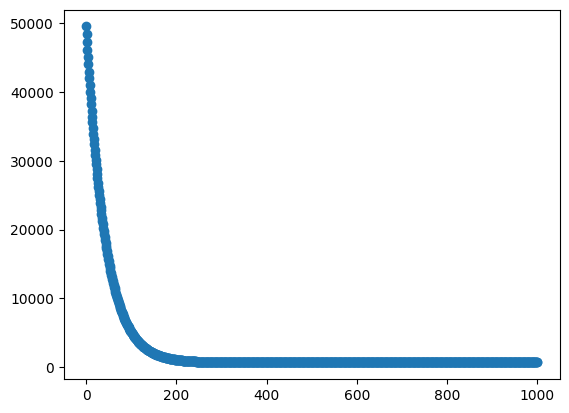

In [109]:
import matplotlib.pyplot as plt

plt.scatter(x=log[:,0], y=log[:,3])
plt.plot(log[:,0], log[:,3])
plt.show()

# Answer

In [112]:
print(f"w = {w_final}")
print(f"b = {b_final}")
print(f"Error = {log[:,3][-1]}")

w = [2.02183456e-01 4.98188783e-04 4.85538721e-05 4.39074080e-03]
b = 9.93445650863749e-05
Error = 696.9718680863228


Conclusion: The model doesn't work well without feature scaling